## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Project Goals
## Create the simplest linear regression model possible with an R^2 value above .55 and coefficients that all make sense, while still fullfilling all the assumptions that come with linear regression.

## Questions:
## 1. How can I create new variables that will be of use to me?
## 2. Will I need to include dummy variables?
## 3. Is there a way to only include 3 variables in my model?

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv("kc_house_data.csv")
df.columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
#Checking for null values
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

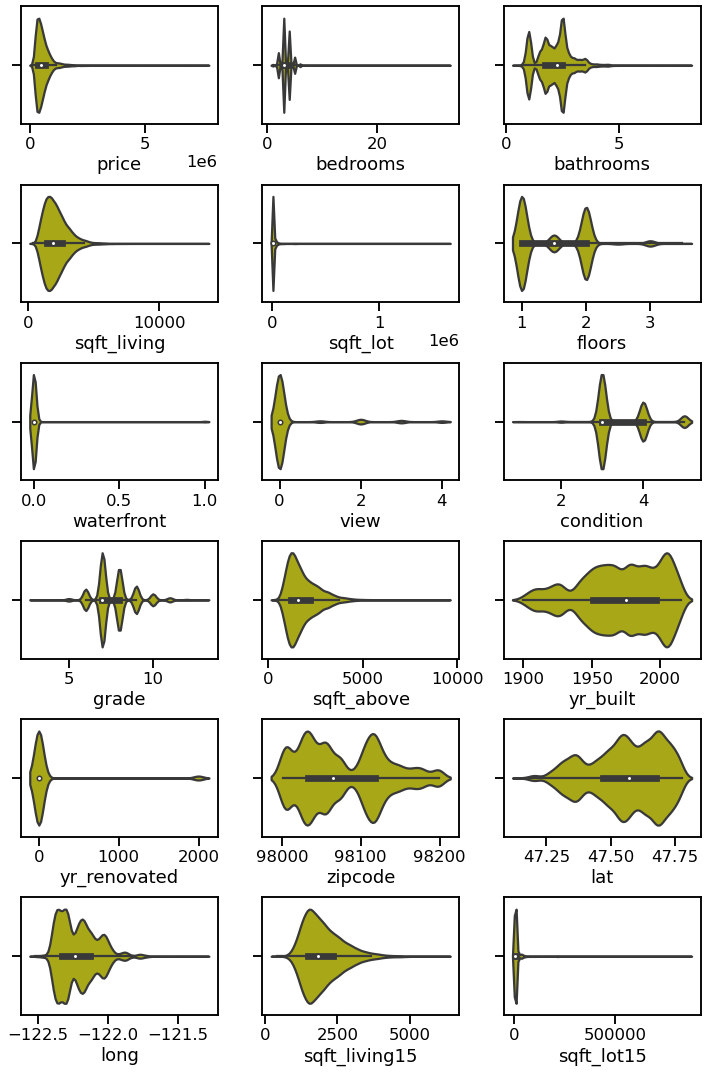

In [6]:
#Looking at distributions for each model
import seaborn as sns 
fig, ax = plt.subplots(6,3, figsize = (10,15))
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
ax = ax.flatten()
for axe, col in zip(ax, columns):
    sns.violinplot(x = col, data = df, ax = axe, color = 'y')
plt.tight_layout()
plt.show()

# Outliers

In [7]:
df.bedrooms.value_counts()
## 33 bedrooms? 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

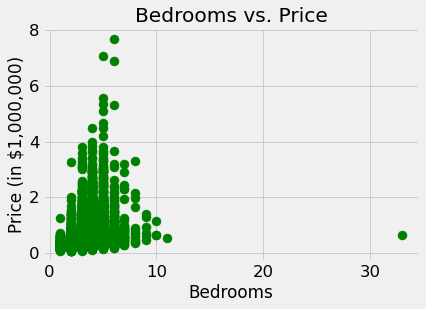

In [8]:
with plt.style.context("fivethirtyeight"):
    plt.scatter(df.bedrooms, df.price/1000000, color = 'green');
    plt.xlabel("Bedrooms");
    plt.ylabel("Price (in $1,000,000)");
    plt.title("Bedrooms vs. Price");
## 33 bedrooms house isn't even priced highly and is certainly an outlier, will be removed

In [3]:
df = df[df["bedrooms"] != 33]

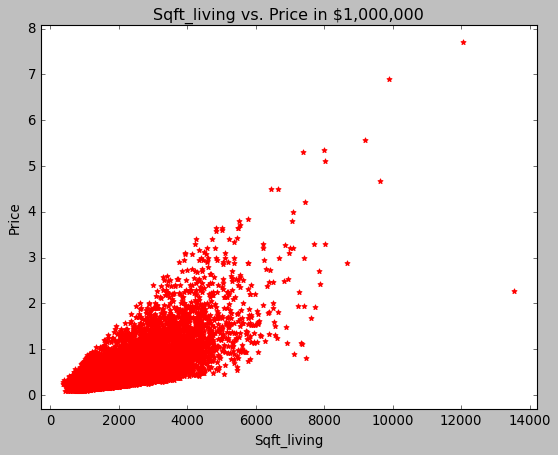

In [5]:
with plt.style.context("classic"):
    plt.scatter(df.sqft_living, df.price/1000000, color = 'r', marker = "*");
    plt.xlabel("Sqft_living")
    plt.ylabel("Price")
    plt.title("Sqft_living vs. Price in $1,000,000")
df.sqft_living.max()
df = df[df["sqft_living"] != 13540]

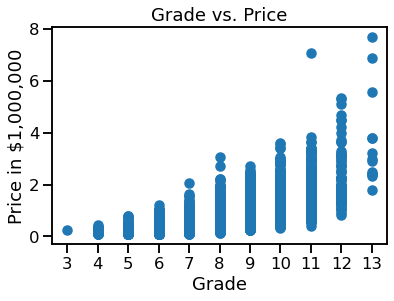

In [11]:
plt.scatter(df.grade, df.price/1000000)
plt.xticks(np.arange(3,14,1));
plt.xlabel("Grade");
plt.ylabel("Price in $1,000,000");
plt.title("Grade vs. Price");


In [6]:
df[df["grade"] == 11]["price"].max() # 7060000
df[df["price"] == 7060000].count() #making sure only one house costs 7060000
df = df[df["price"] != 7060000]
len(df)

21594

# Engineered Variables

## Years since Renovated

In [13]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [14]:
#Years since renovation, 0 corresponds to no renovation 
df["yr_renovated"] = df["yr_renovated"].fillna(0)
df["years_since_renovated"] = 0
df.loc[df["yr_renovated"] != 0, "years_since_renovated"] = df.loc[df["yr_renovated"] != 0, "date"].str.slice(-4).astype(int) - df.loc[df["yr_renovated"] != 0, "yr_renovated"]

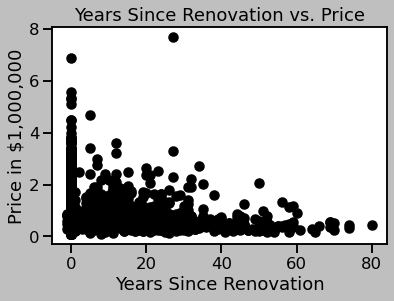

In [15]:
with plt.style.context("grayscale"):
    plt.scatter(df["years_since_renovated"], df["price"]/1000000);
    plt.xlabel("Years Since Renovation")
    plt.ylabel("Price in $1,000,000")
    plt.title("Years Since Renovation vs. Price")
#No real relationship 

In [16]:
df.zipcode.unique()
# 98106 - $53,174 Median Family Income - Poorest zipcode
#98074 - $170,744 Median Family Income - Richest zipcode

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

## Distance Away from mean lat and long coordinates of richest and poorest zip codes


In [25]:
#finding mean coordinates for poor and rich neighborhoods
poor_lat = df.loc[df["zipcode"] == 98106]["lat"].mean()
poor_long = df.loc[df["zipcode"] == 98106]["long"].mean()
rich_lat = df.loc[df["zipcode"] == 98074]["lat"].mean()
rich_long = df.loc[df["zipcode"] == 98074]["long"].mean()

In [26]:
#distance between each house and mean lat and long for poorest zipcode
import geopy.distance
coord_1 = (poor_lat, poor_long)
coords = list(zip(df.lat, df.long))
empty = []
for coord in coords:
    distance = geopy.distance.distance(coord_1, coord).km
    empty.append(abs(distance))
df["zip_distance_poor"] = empty

In [27]:
#distance between each house and mean lat and long for richest zipcode
coord_1 = (rich_lat, rich_long)
coords = list(zip(df.lat, df.long))
empty2 = []
for coord in coords:
    distance = geopy.distance.distance(coord_1, coord).km
    empty2.append(abs(distance))
df["zip_distance_rich"] = empty2

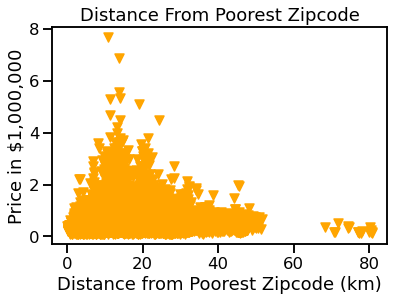

In [28]:
#scatter plot for distance from poorest zip code
with plt.style.context("seaborn-deep"):
    plt.scatter(empty, df["price"]/1000000, color = "orange", marker = "v");
    plt.title("Distance From Poorest Zipcode");
    plt.xlabel("Distance from Poorest Zipcode (km)")
    plt.ylabel("Price in $1,000,000")
#No real relationship here

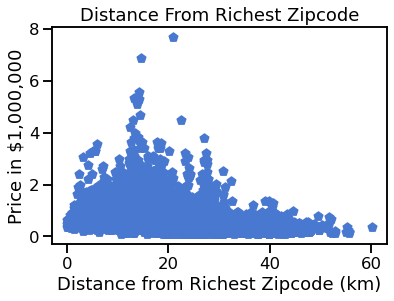

In [29]:
#scatter plot for distance from richest zip code
with plt.style.context("seaborn-muted"): 
    plt.scatter(empty2, df["price"]/1000000, marker = "p");
    plt.title("Distance From Richest Zipcode");
    plt.xlabel("Distance from Richest Zipcode (km)")
    plt.ylabel("Price in $1,000,000")

#slight negative relationship that makes sense, the farther you are from richest zipcode the lower the price 
# of the house

## Has or hasn't been renovated

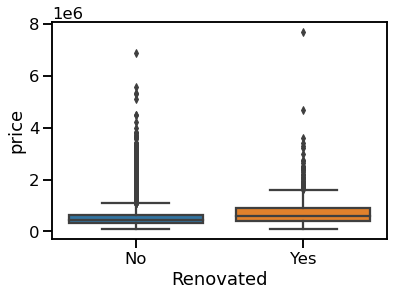

In [22]:

df["yr_renovated"] = df["yr_renovated"].fillna(0)
df["Renovated"] = np.where(df['yr_renovated']== 0, 'No', 'Yes')
sns.boxplot(df["Renovated"], df["price"]);
#No relationship
#change to boxplot

# Effect of having bigger basement space than above the basement

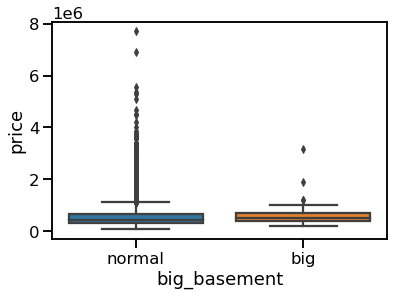

In [23]:
hey = df[df["sqft_basement"] != "?"]
hey.sqft_basment = hey.sqft_basement.astype("float64")
hey["big_basement"] = list(zip(hey["sqft_above"], hey.sqft_basment))
hey["big_basement"] = hey["big_basement"].apply(lambda x: "big" if x[0] < x[1] else "normal")
sns.boxplot(hey["big_basement"], hey.price);

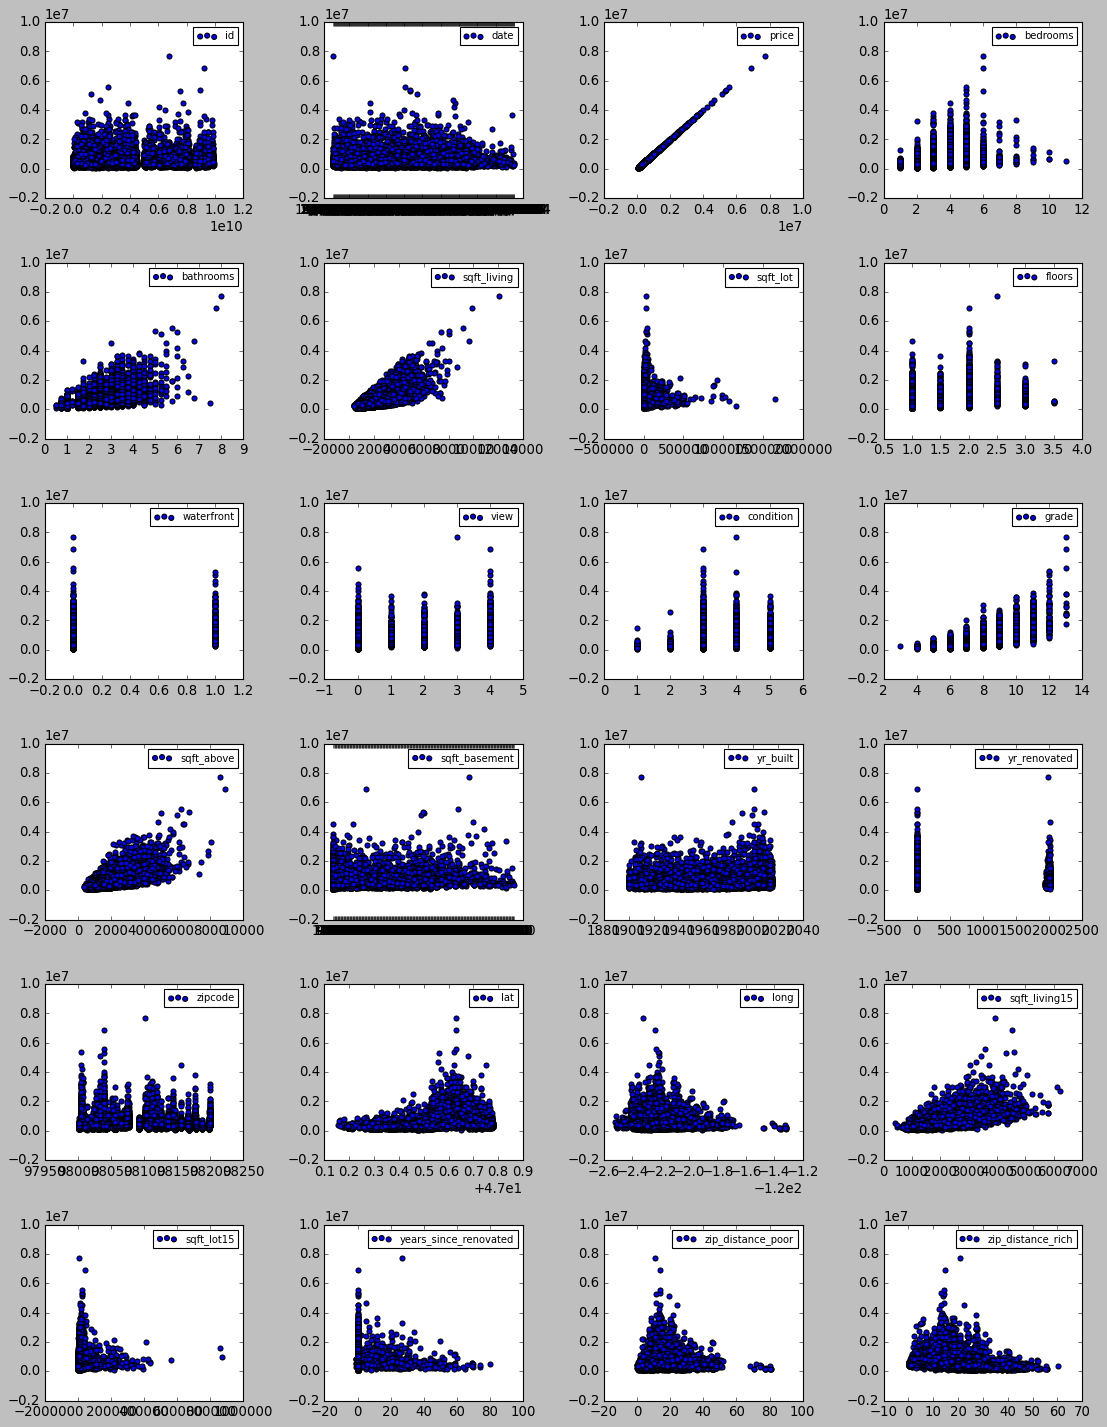

In [24]:
#All variables all mapped against price
with plt.style.context("classic"):
    fig, ax = plt.subplots(6, 4, figsize = (14,18))
    for col, axe in zip(df.columns, ax.flatten()):
        axe.scatter(df[col], df['price'], label = col)
        axe.legend(prop={'size': 9})
        plt.tight_layout()

## Getting Continuous Variables + Checking for Multicolinearity

In [25]:
included = ["bathrooms", "sqft_living", "sqft_above", "sqft_living15", "zip_distance_rich"]

progress = df[included].corr().abs().stack().reset_index().sort_values(0, ascending=False)
progress['pairs'] = list(zip(progress.level_0, progress.level_1))

progress.set_index(['pairs'], inplace = True)

progress.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
progress.columns = ['cc']

progress.drop_duplicates(inplace=True)

progress[(progress.cc>.5) & (progress.cc<1)]


,cc
pairs,
"(sqft_living, sqft_above)",0.875700
"(sqft_living, sqft_living15)",0.757352
"(bathrooms, sqft_living)",0.755324
"(sqft_living15, sqft_above)",0.731769
"(sqft_above, bathrooms)",0.685613
"(sqft_living15, bathrooms)",0.569225


## Get rid of sqft_above

   

In [26]:
included.remove('sqft_above')

## Creating Dummy Variables

In [27]:
beds = pd.get_dummies(df["bedrooms"], "bedrooms", drop_first = True)
grades = pd.get_dummies(df["grade"], "grade", drop_first = True)
categoricals = [beds,grades]
X = pd.concat([df[included], beds, grades], axis = 1)


# Histograms for Continuous Variables

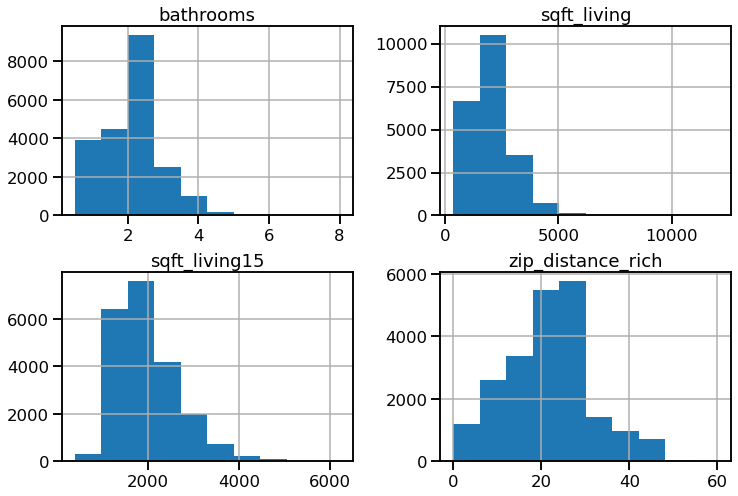

In [28]:
X[included].hist(figsize = (12,8));

In [29]:
X

,bathrooms,sqft_living,sqft_living15,zip_distance_rich,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,1.00,1180,1340,20.310418,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2.25,2570,1690,23.241433,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1.00,770,2720,18.969701,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.00,1960,1360,28.605749,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.00,1680,1800,0.810058,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2.50,1530,1530,24.120938,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21593,2.50,2310,1830,26.993922,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21594,0.75,1020,1020,19.396569,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21595,2.50,1600,1410,10.125407,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# First Iteration

# Lets see the results we have so far..


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, (df["price"]))
linreg.fit(X_train, y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)
r2_score(y_test, y_test_hat)

0.5902537926659093

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=5, shuffle=True)
score = np.mean(cross_val_score(linreg, X, df["price"] , scoring='r2', cv=crossvalidation))
score

0.6096075145910034

## Mean Squared Error

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_hat) 
mean_squared_error(y_train, y_train_hat)

50990815241.992424

## Seeing how interactions affect the correlation

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations

interactions = []
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
feat_combinations = combinations(X.columns, 2)
baseline = 0.55
#only showing results above the baseline value
data = X
for i, (a, b) in enumerate(feat_combinations):
    #creating new column with interaction between each group of two columns
    data['interaction'] = data[a] * data[b]
    #getting mean of cross validated R^2 scores
    score = np.mean(cross_val_score(linreg, data, df["price"] , scoring='r2', cv=crossvalidation))
    if score > baseline:
        #only appending to list if scrore is above .55
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
150
200
250
Top 3 interactions: [('bathrooms', 'sqft_living', 0.626), ('bathrooms', 'grade_13', 0.617), ('sqft_living', 'grade_13', 0.617)]


In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly_train = poly.fit_transform(X_train)
reg_poly = linreg.fit(X_poly_train, y_train)
X_poly_test = poly.transform(X_test)
y_prediction = reg_poly.predict(X_poly_test)
r2_score(y_test, y_prediction)

0.5890673112514497

In [36]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(df["price"], X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1439.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:37:13   Log-Likelihood:            -2.9686e+05
No. Observations:               21594   AIC:                         5.938e+05
Df Residuals:                   21569   BIC:                         5.940e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.793e+05   2.26e+05      2.118      0.034    3.57e+04    9.23e+05
bathrooms         -3949.3014   3267.249     -1.209      0.227   -1.04e+04    2454.748
sqft_living         173.7290      3.828     45.388      0.000     166.227     181.231
sqft_living15        -4.5584      3.761     -1.212      0.225     -11.930       2.813
zip_distance_rich -6436.8622    171.182    -37.603      0.000   -6772.391   -6101.334
bedrooms_2        -1.268e+04   1.71e+04     -0.740      0.459   -4.63e+04    2.09e+04
bedrooms_3        -8.158e+04    1.7e+04     -4.786      0.000   -1.15e+05   -4.82e+04
bedrooms_4         -1.19e+05   1.74e+04     -6.844      0.000   -1.53e+05   -8.49e+04
bedrooms_5        -9.474e+04   1.84e+04     -5.158      0.000   -1.31e+05   -5.87e+04
bedrooms_6        -7.542e+04   2.25e+04     -3.355      0.001   -1.19e+05   -3.14e+04
bedrooms_7        -8.044e+04   4.15e+04     -1.940      0.052   -1.62e+05     831.392
bedrooms_8         9.448e+04   6.54e+04      1.444      0.149   -3.38e+04    2.23e+05
bedrooms_9        -6.652e+04   9.43e+04     -0.705      0.481   -2.51e+05    1.18e+05
bedrooms_10       -1.257e+05   1.32e+05     -0.953      0.341   -3.84e+05    1.33e+05
bedrooms_11       -1.787e+05   2.27e+05     -0.788      0.431   -6.23e+05    2.66e+05
grade_4           -2.236e+05    2.3e+05     -0.970      0.332   -6.75e+05    2.28e+05
grade_5           -1.867e+05   2.27e+05     -0.822      0.411   -6.32e+05    2.58e+05
grade_6           -1.565e+05   2.27e+05     -0.690      0.490   -6.01e+05    2.88e+05
grade_7           -1.219e+05   2.27e+05     -0.538      0.591   -5.66e+05    3.23e+05
grade_8            -7.18e+04   2.27e+05     -0.317      0.752   -5.16e+05    3.73e+05
grade_9            3.404e+04   2.27e+05      0.150      0.881   -4.11e+05    4.79e+05
grade_10           2.046e+05   2.27e+05      0.901      0.368    -2.4e+05     6.5e+05
grade_11           4.678e+05   2.27e+05      2.058      0.040    2.23e+04    9.13e+05
grade_12           1.011e+06   2.28e+05      4.424      0.000    5.63e+05    1.46e+06
grade_13           2.182e+06   2.36e+05      9.244      0.000    1.72e+06    2.64e+06
interaction                0          0        nan        nan           0           0
==============================================================================
Omnibus:                    13479.324   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           325910.566
Skew:                           2.590   Prob(JB):                         0.00
Kurtosis:                      21.314   Cond. No.                     1.07e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smal

## Bathrooms and sqft_living15 both have p values above .05

 ## Many "Grade" Dummies have p values above .05

# Iteration 2

# Changing Things up...
## Getting rid of bathrooms, sqft_above, sqft_living15 from continuous variables, getting rid of grade categorical variable

In [37]:
included_2 = ["sqft_living", "zip_distance_rich" ]
["bathrooms", "sqft_living", "sqft_above", "sqft_living15", "zip_distance_rich"]
progress = df[included_2].corr().abs().stack().reset_index().sort_values(0, ascending=False)
progress['pairs'] = list(zip(progress.level_0, progress.level_1))

progress.set_index(['pairs'], inplace = True)

progress.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
progress.columns = ['cc']

progress.drop_duplicates(inplace=True)

progress[(progress.cc>.2) & (progress.cc<1)]



,cc
pairs,
"(sqft_living, zip_distance_rich)",0.260207


In [38]:
beds = pd.get_dummies(df["bedrooms"], "bedrooms", drop_first = True)
X_new = pd.concat([df[included_2], beds], axis = 1)

In [39]:
X_new

,sqft_living,zip_distance_rich,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11
0,1180,20.310418,0,1,0,0,0,0,0,0,0,0
1,2570,23.241433,0,1,0,0,0,0,0,0,0,0
2,770,18.969701,1,0,0,0,0,0,0,0,0,0
3,1960,28.605749,0,0,1,0,0,0,0,0,0,0
4,1680,0.810058,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,24.120938,0,1,0,0,0,0,0,0,0,0
21593,2310,26.993922,0,0,1,0,0,0,0,0,0,0
21594,1020,19.396569,1,0,0,0,0,0,0,0,0,0
21595,1600,10.125407,0,1,0,0,0,0,0,0,0,0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_new, (df["price"]))
linreg.fit(X_train, y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)
r2_score(y_test, y_test_hat)

0.5423191582623803

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=5, shuffle=True)
score = np.mean(cross_val_score(linreg, X_new, df["price"] , scoring='r2', cv=crossvalidation))
score

0.542316296213815

In [42]:
X_int = sm.add_constant(X_new)
model = sm.OLS(df["price"], X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     2167.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:37:23   Log-Likelihood:            -2.9864e+05
No. Observations:               21594   AIC:                         5.973e+05
Df Residuals:                   21581   BIC:                         5.974e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.333e+05   1.83e+04     12.736      0.000    1.97e+05    2.69e+05
sqft_living         297.8397      2.351    126.685      0.000     293.231     302.448
zip_distance_rich -7323.5156    180.319    -40.614      0.000   -7676.954   -6970.078
bedrooms_2        -3.021e+04   1.82e+04     -1.663      0.096   -6.58e+04    5404.411
bedrooms_3        -1.391e+05   1.78e+04     -7.800      0.000   -1.74e+05   -1.04e+05
bedrooms_4          -2.1e+05   1.82e+04    -11.545      0.000   -2.46e+05   -1.74e+05
bedrooms_5        -2.189e+05   1.92e+04    -11.384      0.000   -2.57e+05   -1.81e+05
bedrooms_6         -2.37e+05   2.37e+04    -10.020      0.000   -2.83e+05   -1.91e+05
bedrooms_7        -2.848e+05   4.45e+04     -6.402      0.000   -3.72e+05   -1.98e+05
bedrooms_8        -1.209e+05   7.06e+04     -1.712      0.087   -2.59e+05    1.76e+04
bedrooms_9         -3.13e+05   1.02e+05     -3.069      0.002   -5.13e+05   -1.13e+05
bedrooms_10       -4.215e+05   1.43e+05     -2.948      0.003   -7.02e+05   -1.41e+05
bedrooms_11        -4.23e+05   2.46e+05     -1.718      0.086   -9.06e+05    5.96e+04
==============================================================================
Omnibus:                    15442.885   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566834.916
Skew:                           3.011   Prob(JB):                         0.00
Kurtosis:                      27.367   Cond. No.                     3.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Low R^2 Value, bedroom coeficients don't make sense

## Iteration 3 - Exchanging bathroom categoricals for grade

In [43]:
grades = pd.get_dummies(df["grade"], "grade", drop_first = True)
X_new2 = pd.concat([df[included_2], grades], axis = 1)

In [44]:
X_int = sm.add_constant(X_new2)
model = sm.OLS(df["price"], X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     2805.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:37:26   Log-Likelihood:            -2.9703e+05
No. Observations:               21594   AIC:                         5.941e+05
Df Residuals:                   21581   BIC:                         5.942e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              4.825e+05   2.28e+05      2.116      0.034    3.55e+04    9.29e+05
sqft_living         149.5679      2.691     55.581      0.000     144.293     154.842
zip_distance_rich -6429.3766    169.809    -37.862      0.000   -6762.215   -6096.538
grade_4           -2.304e+05   2.32e+05     -0.993      0.321   -6.85e+05    2.25e+05
grade_5            -2.17e+05   2.28e+05     -0.950      0.342   -6.65e+05    2.31e+05
grade_6           -1.974e+05   2.28e+05     -0.866      0.387   -6.44e+05     2.5e+05
grade_7           -1.808e+05   2.28e+05     -0.793      0.428   -6.28e+05    2.66e+05
grade_8            -1.31e+05   2.28e+05     -0.575      0.565   -5.78e+05    3.16e+05
grade_9           -2.261e+04   2.28e+05     -0.099      0.921    -4.7e+05    4.24e+05
grade_10           1.584e+05   2.28e+05      0.694      0.488   -2.89e+05    6.06e+05
grade_11           4.345e+05   2.28e+05      1.902      0.057   -1.33e+04    8.82e+05
grade_12           1.002e+06    2.3e+05      4.362      0.000    5.52e+05    1.45e+06
grade_13           2.226e+06   2.37e+05      9.383      0.000    1.76e+06    2.69e+06
==============================================================================
Omnibus:                    13732.196   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345923.295
Skew:                           2.647   Prob(JB):                         0.00
Kurtosis:                      21.880   Cond. No.                     1.11e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# P Values still too high for Grade

# Iteration 4  - # Making Bathrooms continuous

In [45]:
included_3 = ['sqft_living', 'zip_distance_rich', "bathrooms"]
X_new3 = pd.concat([df[included_3],beds], axis = 1)
X_new3

,sqft_living,zip_distance_rich,bathrooms,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11
0,1180,20.310418,1.00,0,1,0,0,0,0,0,0,0,0
1,2570,23.241433,2.25,0,1,0,0,0,0,0,0,0,0
2,770,18.969701,1.00,1,0,0,0,0,0,0,0,0,0
3,1960,28.605749,3.00,0,0,1,0,0,0,0,0,0,0
4,1680,0.810058,2.00,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,24.120938,2.50,0,1,0,0,0,0,0,0,0,0
21593,2310,26.993922,2.50,0,0,1,0,0,0,0,0,0,0
21594,1020,19.396569,0.75,1,0,0,0,0,0,0,0,0,0
21595,1600,10.125407,2.50,0,1,0,0,0,0,0,0,0,0


In [46]:
X_int = sm.add_constant(X_new3)
model = sm.OLS(df["price"], X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     2002.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:37:27   Log-Likelihood:            -2.9864e+05
No. Observations:               21594   AIC:                         5.973e+05
Df Residuals:                   21580   BIC:                         5.974e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.272e+05   1.84e+04     12.331      0.000    1.91e+05    2.63e+05
sqft_living         292.1296      3.046     95.897      0.000     286.159     298.101
zip_distance_rich -7309.3696    180.351    -40.529      0.000   -7662.870   -6955.869
bathrooms          9954.3497   3377.897      2.947      0.003    3333.422    1.66e+04
bedrooms_2        -3.136e+04   1.82e+04     -1.726      0.084    -6.7e+04    4257.028
bedrooms_3        -1.427e+05   1.79e+04     -7.982      0.000   -1.78e+05   -1.08e+05
bedrooms_4        -2.139e+05   1.82e+04    -11.731      0.000    -2.5e+05   -1.78e+05
bedrooms_5        -2.234e+05   1.93e+04    -11.583      0.000   -2.61e+05   -1.86e+05
bedrooms_6        -2.431e+05   2.37e+04    -10.238      0.000    -2.9e+05   -1.97e+05
bedrooms_7         -2.93e+05   4.46e+04     -6.574      0.000    -3.8e+05   -2.06e+05
bedrooms_8        -1.288e+05   7.07e+04     -1.823      0.068   -2.67e+05    9701.243
bedrooms_9        -3.297e+05   1.02e+05     -3.228      0.001    -5.3e+05   -1.29e+05
bedrooms_10       -4.285e+05   1.43e+05     -2.997      0.003   -7.09e+05   -1.48e+05
bedrooms_11         -4.3e+05   2.46e+05     -1.747      0.081   -9.13e+05    5.25e+04
==============================================================================
Omnibus:                    15454.453   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           566575.928
Skew:                           3.015   Prob(JB):                         0.00
Kurtosis:                      27.359   Cond. No.                     3.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# R^2 too low, bedroom coeficients still don't make sense

## Iteration 5, adding "Grade" as a continuous variable

In [47]:
included_4 = ['sqft_living', 'zip_distance_rich', "bathrooms", "grade"]
X_new4 = pd.concat([df[included_4],beds], axis = 1)
X_new4

,sqft_living,zip_distance_rich,bathrooms,grade,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11
0,1180,20.310418,1.00,7,0,1,0,0,0,0,0,0,0,0
1,2570,23.241433,2.25,7,0,1,0,0,0,0,0,0,0,0
2,770,18.969701,1.00,6,1,0,0,0,0,0,0,0,0,0
3,1960,28.605749,3.00,7,0,0,1,0,0,0,0,0,0,0
4,1680,0.810058,2.00,8,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1530,24.120938,2.50,8,0,1,0,0,0,0,0,0,0,0
21593,2310,26.993922,2.50,8,0,0,1,0,0,0,0,0,0,0
21594,1020,19.396569,0.75,7,1,0,0,0,0,0,0,0,0,0
21595,1600,10.125407,2.50,8,0,1,0,0,0,0,0,0,0,0


In [48]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     1777.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:37:29   Log-Likelihood:            -2.2412e+05
No. Observations:               16195   AIC:                         4.483e+05
Df Residuals:                   16183   BIC:                         4.484e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.181e+05   2.13e+04     10.242      0.000    1.76e+05     2.6e+05
sqft_living         302.6313      2.747    110.168      0.000     297.247     308.016
zip_distance_rich -7275.0984    208.756    -34.850      0.000   -7684.283   -6865.913
bedrooms_2        -2.148e+04   2.11e+04     -1.018      0.309   -6.28e+04    1.99e+04
bedrooms_3        -1.336e+05   2.07e+04     -6.452      0.000   -1.74e+05    -9.3e+04
bedrooms_4        -2.092e+05   2.11e+04     -9.903      0.000   -2.51e+05   -1.68e+05
bedrooms_5        -2.208e+05   2.23e+04     -9.893      0.000   -2.65e+05   -1.77e+05
bedrooms_6        -2.305e+05   2.75e+04     -8.385      0.000   -2.84e+05   -1.77e+05
bedrooms_7        -2.979e+05    5.4e+04     -5.514      0.000   -4.04e+05   -1.92e+05
bedrooms_8         1.481e+05   9.04e+04      1.639      0.101    -2.9e+04    3.25e+05
bedrooms_9        -3.066e+05   1.26e+05     -2.438      0.015   -5.53e+05   -6.01e+04
bedrooms_10       -4.247e+05   1.45e+05     -2.935      0.003   -7.08e+05   -1.41e+05
bedrooms_11                0          0        nan        nan           0           0
==============================================================================
Omnibus:                    12088.794   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513912.401
Skew:                           3.160   Prob(JB):                         0.00
Kurtosis:                      29.864   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Bathroom and Bedroom coeficients don't make sense, R^2 still too low

# Iteration 6 - new Bedroom Variables

In [49]:
#grouping bedrooms in groups of 1-2, 3-6, or over 6
df["beds_cat"] = df["bedrooms"]
df["beds_cat"] = df["beds_cat"].apply(lambda x: "1-2" if x in range(1,3) else("3-6" if x in range(3,7) else "above 6"))
df["beds_cat"]
beds_cat = pd.get_dummies(df["beds_cat"], "beds_cat", drop_first = True)

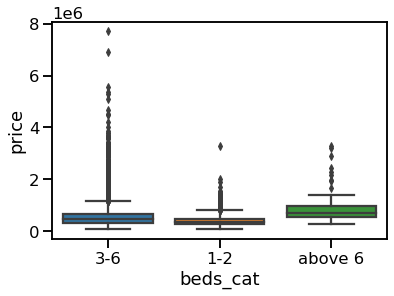

In [50]:
sns.boxplot(df["beds_cat"], df["price"]);

In [51]:
included_6 = ['sqft_living', "grade"]
X_new6 = pd.concat([df[included_6], beds_cat], axis = 1)
X_new6

,sqft_living,grade,beds_cat_3-6,beds_cat_above 6
0,1180,7,1,0
1,2570,7,1,0
2,770,6,0,0
3,1960,7,1,0
4,1680,8,1,0
...,...,...,...,...
21592,1530,8,1,0
21593,2310,8,1,0
21594,1020,7,0,0
21595,1600,8,1,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_new6, np.log(df["price"]))
linreg.fit(X_train, y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)
r2_score(y_test, y_test_hat)

0.5560929292914564

In [53]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     5156.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:37:35   Log-Likelihood:                -5882.2
No. Observations:               16195   AIC:                         1.177e+04
Df Residuals:                   16190   BIC:                         1.181e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               11.2549      0.022    511.339      0.000      11.212      11.298
sqft_living          0.0002   4.84e-06     49.249      0.000       0.000       0.000
grade                0.1824      0.004     50.397      0.000       0.175       0.190
beds_cat_3-6        -0.1148      0.009    -13.423      0.000      -0.132      -0.098
beds_cat_above 6    -0.0011      0.054     -0.020      0.984      -0.107       0.105
==============================================================================
Omnibus:                       36.098   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.320
Skew:                           0.115   Prob(JB):                     1.30e-08
Kurtosis:                       2.966   Cond. No.                     4.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Not Horrible, but improvements can be made with P-Value

## Messing around more with Bedroom Variables


In [54]:
included_7 = ["sqft_living", "grade", "beds_cat"]
dic1_r2 = {}
#bedrooms range from 1-11
for i in range(1,11):
    for j in range(i+1, 12):
        crossvalidation = KFold(n_splits=5, shuffle=False)
        df["beds_cat"] = df["bedrooms"]
        #Looping over different combinations of grouping bedrooms, i is lower range, i-j medium range, above j
        # is upper range
        df["beds_cat"] = df["beds_cat"].apply(lambda x: "1-" + str(i) if x in range(1,i) else("i-j" if x in range(i,j) else "above j"))
        df3 = df[included_7].copy()
        df3 = pd.get_dummies(df3, "beds_cat", drop_first = True)
        #creating dummies for each iteration, seeing hoe they affect R^2 and also getting cross-validating
        X_train, X_test, y_train, y_test = train_test_split(df3, np.log(df["price"]))
        linreg.fit(X_train, y_train)
        y_train_hat = linreg.predict(X_train)
        y_test_hat = linreg.predict(X_test)
        score = r2_score(y_test, y_test_hat)
        score2 = np.mean(cross_val_score(linreg, df3, np.log(df["price"]), scoring='r2', cv=crossvalidation))
        dic1_r2[(i,j)] = (score, score2)
        #score is regular r^2, score 2 is cross-validated r^2

In [55]:
dic1_r2
#Results aren't that significant

{(1, 2): (0.5563598926512541, 0.5538769779009028),
 (1, 3): (0.5536092937578718, 0.5580523708007644),
 (1, 4): (0.5504935845734141, 0.5539455223879657),
 (1, 5): (0.5622792360684377, 0.5537975454370434),
 (1, 6): (0.5559746185402876, 0.5537434085924202),
 (1, 7): (0.5536252864575903, 0.5537935387554238),
 (1, 8): (0.5474702469417487, 0.5538658660697103),
 (1, 9): (0.5603483108171653, 0.5538119047644254),
 (1, 10): (0.5625369349650617, 0.5538059928902472),
 (1, 11): (0.5491893142017525, 0.5537987666877687),
 (2, 3): (0.5582158604681742, 0.5579857334410161),
 (2, 4): (0.5496632095908351, 0.5540192891392861),
 (2, 5): (0.5467069396392754, 0.5538743847820013),
 (2, 6): (0.5424420811391963, 0.5538217500893465),
 (2, 7): (0.5565474330582423, 0.5538714729583342),
 (2, 8): (0.5393164779245087, 0.5539436207922923),
 (2, 9): (0.5536567123134261, 0.5538898136122501),
 (2, 10): (0.5734754351496105, 0.5538841392422648),
 (2, 11): (0.5522133482450373, 0.5538769315542288),
 (3, 4): (0.551817966734605

# Getting rid of all rows with bedrooms above 5

In [56]:
df_attempt = df[(df["bedrooms"] != 7) & (df["bedrooms"] != 8) & (df["bedrooms"] != 9) & (df["bedrooms"] != 10) & (df["bedrooms"] != 11) & (df["bedrooms"] != 6)]
df_attempt.bedrooms.value_counts()

3    9824
4    6882
2    2760
5    1600
1     196
Name: bedrooms, dtype: int64

In [57]:
beds = pd.get_dummies(df_attempt["bedrooms"], "bedrooms", drop_first = True)
Xnew8 = pd.concat([df_attempt[included_7], beds], axis = 1)
Xnew8.drop(columns =["beds_cat"], axis = 1, inplace = True)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(Xnew8, df_attempt["price"])
linreg.fit(X_train, y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)
r2_score(y_test, y_test_hat)

0.5583667887802573

In [59]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     3178.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:37:43   Log-Likelihood:            -2.2007e+05
No. Observations:               15946   AIC:                         4.401e+05
Df Residuals:                   15939   BIC:                         4.402e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.761e+05   2.39e+04    -19.927      0.000   -5.23e+05   -4.29e+05
sqft_living   205.0409      3.861     53.104      0.000     197.473     212.609
grade        9.845e+04   2576.683     38.208      0.000    9.34e+04    1.04e+05
bedrooms_2  -5.053e+04   2.04e+04     -2.477      0.013   -9.05e+04   -1.05e+04
bedrooms_3  -1.622e+05      2e+04     -8.098      0.000   -2.01e+05   -1.23e+05
bedrooms_4  -2.088e+05   2.04e+04    -10.225      0.000   -2.49e+05   -1.69e+05
bedrooms_5  -1.789e+05   2.16e+04     -8.290      0.000   -2.21e+05   -1.37e+05
==============================================================================
Omnibus:                     9904.792   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220890.246
Skew:                           2.598   Prob(JB):                         0.00
Kurtosis:                      20.477   Cond. No.                     5.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Still not happy with bedroom coeficients

In [60]:
df.grade.value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     398
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

# Iteration 9 - Getting rid of Bedrooms, adding back distance from rich neighborhoods

In [61]:
included_9 = ["sqft_living", "zip_distance_rich", "grade"]
Xnew_9 = df[included_9]


In [62]:
X_train, X_test, y_train, y_test = train_test_split(Xnew_9, np.log(df["price"]))
linreg.fit(X_train, y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)
r2_score(y_test, y_test_hat)

0.6340314692452758

In [63]:
X_int = sm.add_constant(X_train)
model = sm.OLS(y_train, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     9270.
Date:                Mon, 21 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:38:10   Log-Likelihood:                -4503.9
No. Observations:               16195   AIC:                             9016.
Df Residuals:                   16191   BIC:                             9047.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.7996      0.022    530.983      0.000      11.756      11.843
sqft_living           0.0002   4.24e-06     48.631      0.000       0.000       0.000
zip_distance_rich    -0.0162      0.000    -58.928      0.000      -0.017      -0.016
grade                 0.1530      0.003     45.724      0.000       0.146       0.160
==============================================================================
Omnibus:                      562.617   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.259
Skew:                           0.471   Prob(JB):                    7.56e-136
Kurtosis:                       3.189   Cond. No.                     2.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
mean_squared_error(y_train, y_train_hat) 

0.10211402837895349

In [65]:
crossvalidation = KFold(n_splits=5, shuffle=True)
score = np.mean(cross_val_score(linreg, Xnew_9, df["price"] , scoring='r2', cv=crossvalidation))
score

0.5594792740647299

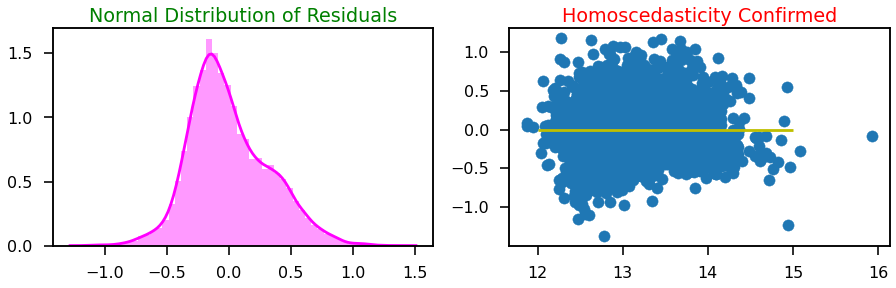

In [66]:
with plt.style.context("seaborn-poster"):
    fig, ax = plt.subplots(1,2, figsize = (15,4))
    sns.distplot(model.resid, ax = ax[0], color = 'magenta').set_title("Normal Distribution of Residuals", color = 'green');
    residual = y_test - y_test_hat
    ax[1].scatter(y_test_hat, residual);
    ax[1].set_title("Homoscedasticity Confirmed", color = 'r')
    ax[1].hlines(0, 12,15, color = "y")

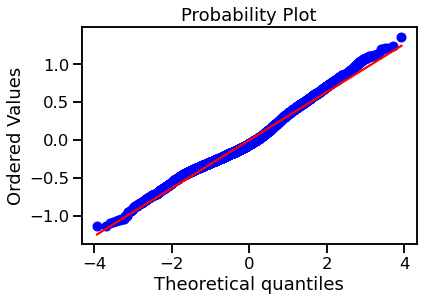

In [67]:
import pylab 
import scipy.stats as stats
stats.probplot(model.resid, dist="norm", plot=pylab);

In [68]:
progress = Xnew_9.corr().abs().stack().reset_index().sort_values(0, ascending=False)
progress['pairs'] = list(zip(progress.level_0, progress.level_1))

progress.set_index(['pairs'], inplace = True)

progress.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
progress.columns = ['cc']

progress.drop_duplicates(inplace=True)

progress[(progress.cc>.5) & (progress.cc<1)]



,cc
pairs,
"(sqft_living, grade)",0.763973


# Explaining results in terms of natural log of price

* square feet:    exp(.0002) = 1.00020002
* km away from rich neighborgood:   exp(-0.0158) = .98432
* grade:   exp(0.1540) = 1.166

### The house price will increase by .02% for each increase in square feet (house price increases by 2% for 100 additional square feet). For each additional kilometer the house is away from the richest neighborhood, the price of the house will decrease by about 1.56 percent. For each increase in the grade of the house, the price of the house will increase by 16.6 percent.

# Conclusion
### The final model fulfilled all the assumptions of linear regression, including linearity, normality, homoscedasticity. Adding on, we accomplished an r^2 value of greater than .55, with p-values all below .05. Each variable also made sense. For example, the coefficient for square feet being positive, meaning that the price will increase for each additonal square foot.  From a business perspective, if aspiring home owners are looking to save money on their first house, they should be willing to buy a house with a more space and a better location while giving up grade.

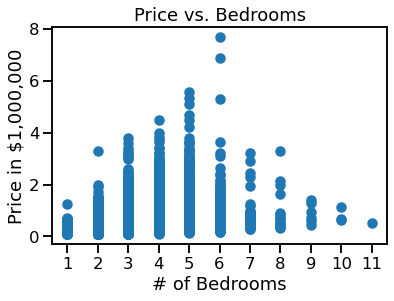

In [9]:
plt.scatter(df.bedrooms,df.price/1000000);
plt.ylabel("Price in $1,000,000");
plt.xlabel("# of Bedrooms");
plt.xticks(np.arange(1,12,1));
plt.title("Price vs. Bedrooms");

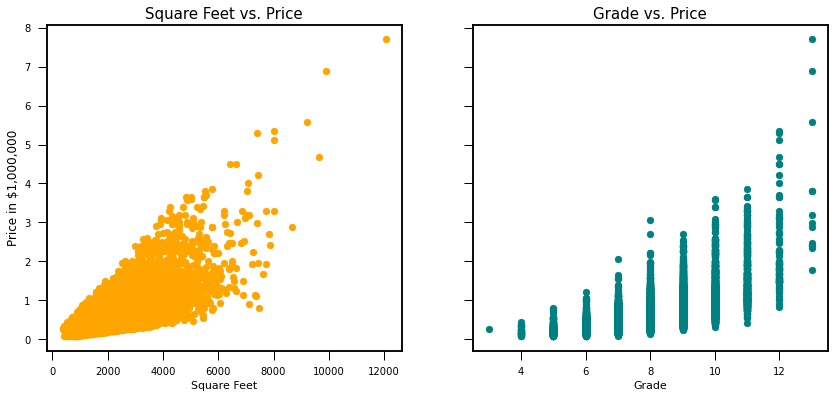

In [22]:
with plt.style.context("seaborn-notebook"):
    fig, ax = plt.subplots(1,2, figsize = (14,6), sharey = True)
    ax[0].scatter(df.sqft_living, df.price/1000000, color = "orange");
    ax[0].set_title("Square Feet vs. Price", size = 15)
    ax[0].set_ylabel("Price in $1,000,000", size = 12)
    ax[0].set_xlabel("Square Feet")
    ax[1].scatter(df.grade, df.price/1000000, color = "teal");
    ax[1].set_title("Grade vs. Price", size = 15)
    ax[1].set_xlabel("Grade")
    

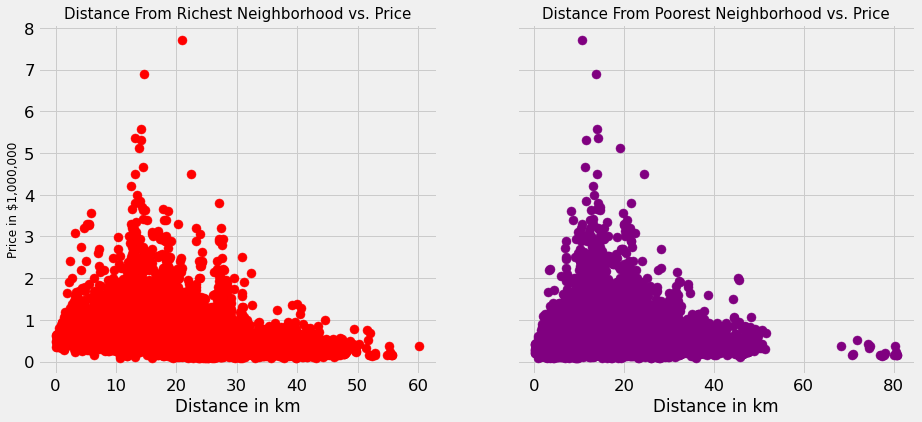

In [35]:
with plt.style.context("fivethirtyeight"):
    fig, ax = plt.subplots(1,2, figsize = (14,6), sharey = True)
    ax[0].scatter(df["zip_distance_rich"], df.price/1000000, color = "red");
    ax[0].set_title("Distance From Richest Neighborhood vs. Price", size = 15)
    ax[0].set_ylabel("Price in $1,000,000", size = 12)
    ax[0].set_xlabel("Distance in km")
    ax[1].scatter(df["zip_distance_poor"], df.price/1000000, color = "purple");
    ax[1].set_title("Distance From Poorest Neighborhood vs. Price", size = 15)
    ax[1].set_xlabel("Distance in km")
    